This is the one of the most used dataset in machine learning field. This model was possible with some reading of Introduction to Machine Learning with python: A guide for Data Scientists by Andreas C.Muller & Sarah Guido.

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=c5936b8df48dc277849a5baae6d7e76720afa87069e26e3f624b697af7575613
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() #Bunch Object

In [3]:
print('Keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR']) #Description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#Species of the flower that we want to predict
print('Target names: \n{}'.format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [6]:
#Description of each features(columns)
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
type(iris_dataset['target'])

numpy.ndarray

In [8]:
iris_dataset['data'].shape

(150, 4)

In [9]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
iris_dataset['target'].shape

(150,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [12]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


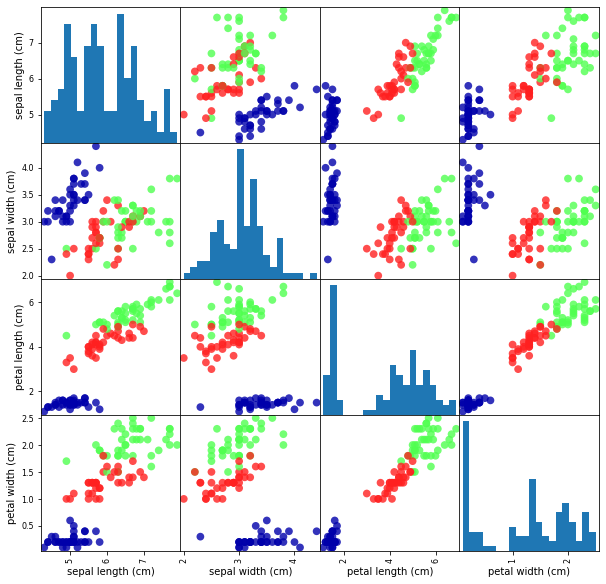

In [14]:
iris_dataframe = pd.DataFrame(data=X_train, columns=iris_dataset['feature_names'])
# iris_dataframe.head()
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [0]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new Shape: {}'.format(X_new.shape))

X_new Shape: (1, 4)


In [18]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [19]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [20]:
print('Test set score: {:.3f}'.format(np.mean(y_pred == y_test)))

Test set score: 0.974


In [21]:
print('Test set score using score method of the knn object: {:.3f}'.format(knn.score(X_test, y_test)))

Test set score using score method of the knn object: 0.974


X shape: (26, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


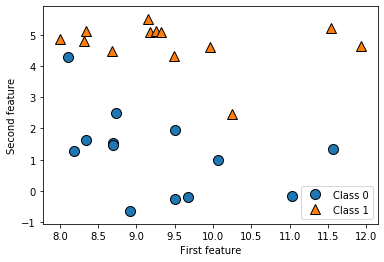

In [22]:
X, y = mglearn.datasets.make_forge()
# X
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

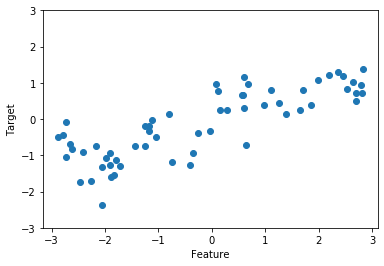

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=60)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [25]:
print('Shape of the cancer dataset: {}'.format(cancer.data.shape))

Shape of the cancer dataset: (569, 30)


In [26]:
# print(cancer.target_names[0])
# print(cancer.target.sum())
# print(cancer.DESCR)
# cancer.target[cancer.target_names[0]]
mal, ben = 0, 0
for i in range(len(cancer.target)):
  if cancer.target[i] == 0:
    mal = mal + 1
  else:
    ben = ben + 1
print('Malignant: {}'.format(mal))
print('Benign: {}'.format(ben))

Malignant: 212
Benign: 357


In [27]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [29]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
print('Test set prediction: {}'.format(clf.predict(X_test)))

Test set prediction: [1 0 1 0 1 0 0]


In [31]:
print('Test set accuracy: {:.3f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.857


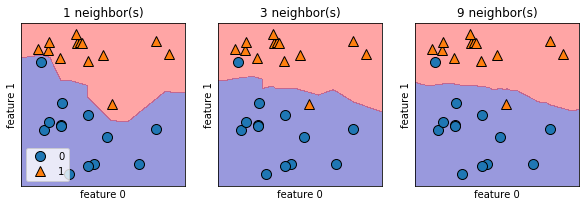

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel('feature 0')
  ax.set_ylabel('feature 1')
axes[0].legend(loc=3)